/tmp/ipykernel_9981/3733166297.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


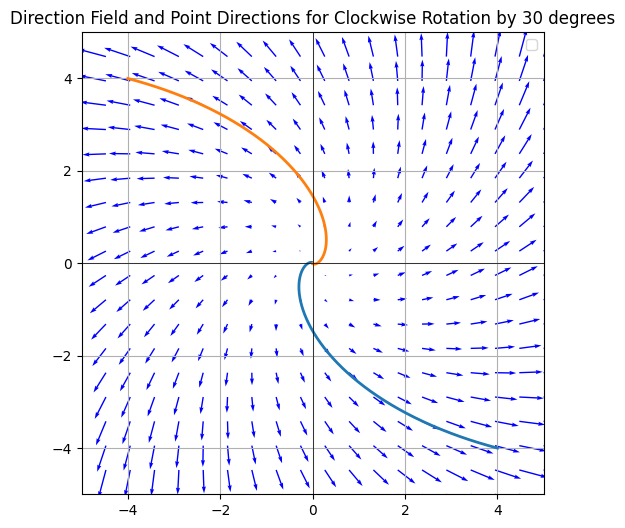

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rotation angle (in degrees and then convert to radians)
theta_deg = 30
theta = np.radians(theta_deg)  # Convert to radians

# Define the rotation transformation as a function
def rotation_field(x, y, theta):
    # Clockwise rotation
    x_prime = x * np.cos(-theta) + y * np.sin(-theta)
    y_prime = -x * np.sin(-theta) + y * np.cos(-theta)
    return x_prime, y_prime

# Create a grid of points (x, y) where we want to plot the direction field
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the direction of the vector field at each point (X, Y)
U, V = rotation_field(X, Y, theta)

# Plot the direction field
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=10, color='blue')

# Overlay some trajectories
def trajectory(init_X, init_Y, t_max=100, dt=0.01):
    t = np.arange(0, t_max, dt)
    X_traj, Y_traj = np.zeros_like(t), np.zeros_like(t)
    X_traj[0], Y_traj[0] = init_X, init_Y
    for i in range(1, len(t)):
        dX, dY = rotation_field(X_traj[i-1], Y_traj[i-1], theta)  # Correct indexing here
        X_traj[i] = X_traj[i-1] - dX * dt  # Move in the direction of the field
        Y_traj[i] = Y_traj[i-1] - dY * dt  # Move in the direction of the field
    return X_traj, Y_traj

initial_conditions = [(4, -4), (-4, 4)]
# Annotate the points with their coordinates
for X, Y in initial_conditions:
    X_traj, Y_traj = trajectory(X, Y)
    plt.plot(X_traj, Y_traj, lw=2)

# Set the aspect ratio to be equal for both axes
plt.gca().set_aspect('equal', adjustable='box')
# Adding labels and title
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.title(f'Direction Field and Point Directions for Clockwise Rotation by {theta_deg} degrees')

# Show the plot with a legend
plt.legend()
plt.show()
